## import libraries

In [14]:
import pandas as pd
import numpy as np
import pandas_datareader as api
import seaborn as sns
import matplotlib.pyplot as plt

## Extracting data from yahoo finance

In [9]:
data = api.DataReader('OXY',data_source='yahoo',start='2019-03-31',end='2022-03-31')
#stock_data['Date']= stock_data.index
data

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-04-01,67.279999,66.540001,66.889999,67.180000,2809900.0,61.413784
2019-04-02,67.629997,66.190002,67.209999,66.629997,3312400.0,60.910980
2019-04-03,67.230003,65.839996,67.230003,66.059998,3056700.0,60.389908
2019-04-04,66.620003,65.570000,66.110001,66.440002,2855700.0,60.737301
2019-04-05,68.360001,66.650002,66.660004,68.040001,3808400.0,62.199970
...,...,...,...,...,...,...
2022-03-25,60.709999,57.180000,57.500000,58.709999,37749900.0,58.709999
2022-03-28,57.570000,55.590000,56.820000,56.639999,24924700.0,56.639999
2022-03-29,56.959999,54.509998,55.570000,56.790001,29111200.0,56.790001


In [204]:
## re indexing 
data = data.reindex(columns=['High', 'Low', 'Open', 'Volume', 'Adj Close', 'Close'])
data

,High,Low,Open,Volume,Adj Close,Close
Date,,,,,,
2019-04-01,67.279999,66.540001,66.889999,2809900.0,61.413784,67.180000
2019-04-02,67.629997,66.190002,67.209999,3312400.0,60.910980,66.629997
2019-04-03,67.230003,65.839996,67.230003,3056700.0,60.389908,66.059998
2019-04-04,66.620003,65.570000,66.110001,2855700.0,60.737301,66.440002
2019-04-05,68.360001,66.650002,66.660004,3808400.0,62.199970,68.040001
...,...,...,...,...,...,...
2022-03-25,60.709999,57.180000,57.500000,37749900.0,58.709999,58.709999
2022-03-28,57.570000,55.590000,56.820000,24924700.0,56.639999,56.639999
2022-03-29,56.959999,54.509998,55.570000,29111200.0,56.790001,56.790001


## saving our dataset into a csv file

In [205]:
## converting data into csv
data.to_csv('OXY.csv')

In [206]:
## reading from csv
stock_data = pd.read_csv('OXY.csv')

In [250]:
stock_data.head()

,Date,High,Low,Open,Volume,Adj Close,Close
0,2019-04-01,67.279999,66.540001,66.889999,2809900.0,61.413784,67.180000
1,2019-04-02,67.629997,66.190002,67.209999,3312400.0,60.910980,66.629997
2,2019-04-03,67.230003,65.839996,67.230003,3056700.0,60.389908,66.059998
3,2019-04-04,66.620003,65.570000,66.110001,2855700.0,60.737301,66.440002
4,2019-04-05,68.360001,66.650002,66.660004,3808400.0,62.199970,68.040001


In [208]:
## checking for Null values
stock_data.isnull().sum()

Date         0
High         0
Low          0
Open         0
Volume       0
Adj Close    0
Close        0
dtype: int64

## Exploratory data analysis

In [209]:
## correlations between the variable
corr_matrix = stock_data.corr()
corr_matrix

,High,Low,Open,Volume,Adj Close,Close
High,1.000000,0.998369,0.998758,-0.341917,0.996943,0.999072
Low,0.998369,1.000000,0.999040,-0.380243,0.995238,0.998858
Open,0.998758,0.999040,1.000000,-0.366174,0.994614,0.997883
Volume,-0.341917,-0.380243,-0.366174,1.000000,-0.340911,-0.355420
Adj Close,0.996943,0.995238,0.994614,-0.340911,1.000000,0.997333
Close,0.999072,0.998858,0.997883,-0.355420,0.997333,1.000000


<AxesSubplot:>

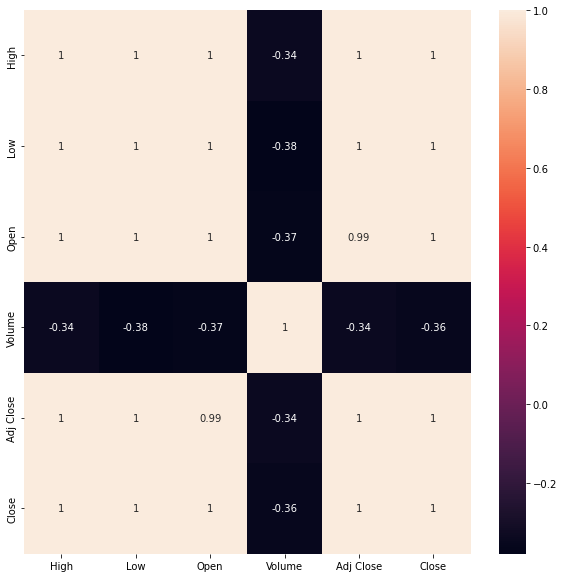

In [210]:
## heatmap showing the correlations between the variable
plt.figure(figsize=(10,10))
sns.heatmap(corr_matrix, annot =  True )

<function matplotlib.pyplot.show(close=None, block=None)>

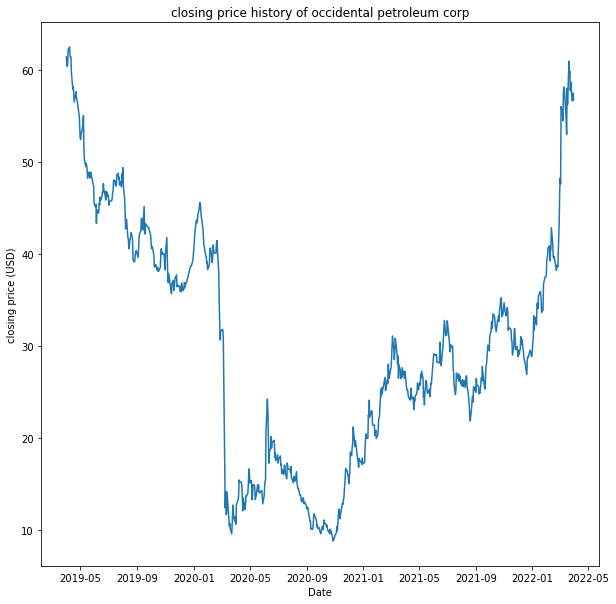

In [212]:
#Description:visualizing the adj closing price action from the start date to 
#the end date to see the price action of the oxy oil amidst the pandemic
plt.figure(figsize=(10,10))
plt.title('closing price history of occidental petroleum corp')
plt.plot(data['Adj Close'])
plt.xlabel('Date')
plt.ylabel('closing price (USD)')
plt.show

## Data for machine learning deployment

In [221]:
X = stock_data.iloc[:, 1:-1].values
y = stock_data.iloc[:, -1].values

In [222]:
X ## independent variable

array([[6.72799988e+01, 6.65400009e+01, 6.68899994e+01, 2.80990000e+06,
        6.14137840e+01],
       [6.76299973e+01, 6.61900024e+01, 6.72099991e+01, 3.31240000e+06,
        6.09109802e+01],
       [6.72300034e+01, 6.58399963e+01, 6.72300034e+01, 3.05670000e+06,
        6.03899078e+01],
       ...,
       [5.69599991e+01, 5.45099983e+01, 5.55699997e+01, 2.91112000e+07,
        5.67900009e+01],
       [5.98400002e+01, 5.71100006e+01, 5.83100014e+01, 2.60690000e+07,
        5.74799995e+01],
       [5.92200012e+01, 5.65200005e+01, 5.67599983e+01, 3.22175000e+07,
        5.67400017e+01]])

In [223]:
y ## dependent variable

array([67.18000031, 66.62999725, 66.05999756, 66.44000244, 68.04000092,
       68.37000275, 67.27999878, 67.18000031, 67.18000031, 65.33000183,
       63.36000061, 63.66999817, 62.65000153, 61.81999969, 63.04999924,
       62.36000061, 62.        , 61.84000015, 61.31000137, 60.13000107,
       58.88000107, 57.47999954, 57.34999847, 57.95000076, 58.77000046,
       59.68999863, 60.20999908, 56.33000183, 54.97000122, 54.16999817,
       54.54999924, 54.25      , 53.75      , 52.75999832, 53.45999908,
       53.50999832, 52.77999878, 52.90999985, 53.47000122, 52.27999878,
       52.        , 51.90999985, 49.77000046, 49.31999969, 49.68999863,
       47.43000031, 49.04000092, 47.84000015, 47.90000153, 49.04999924,
       48.79000092, 49.72999954, 49.31000137, 49.81000137, 50.34999847,
       50.29999924, 51.29999924, 50.61000061, 49.88999939, 49.38000107,
       50.41999817, 49.75      , 50.27999878, 49.77999878, 48.77999878,
       49.16999817, 49.27999878, 49.29999924, 49.61000061, 50.24

## Data Splitting

In [224]:
## 20% for test and 80% for train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size = 0.2, random_state = 0) 

## Feature Scaling

In [225]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [226]:
print(X_train)

[[-0.46537479 -0.51976211 -0.46437988  0.00962995 -0.5095023 ]
 [-1.50490094 -1.48071189 -1.49893587 -0.10751863 -1.52678496]
 [-1.54753355 -1.51029067 -1.52326147 -0.08433249 -1.59811676]
 ...
 [-0.0632068  -0.06814454 -0.0422582   0.57643947 -0.02742329]
 [-0.20957886 -0.19295255 -0.21539965  0.2326632  -0.17662466]
 [-0.21313153 -0.23768151 -0.1803421  -0.09535282 -0.13387276]]


In [227]:
print(X_test)

[[-3.20423716e-01 -3.19924916e-01 -3.43467152e-01  4.56086392e-03
  -2.86010601e-01]
 [-1.46226826e+00 -1.41578288e+00 -1.42882070e+00  1.02920904e-01
  -1.49195885e+00]
 [-1.23560470e+00 -1.23831016e+00 -1.27070392e+00  2.27216761e+00
  -1.27569160e+00]
 [ 1.48364778e+00  1.53632419e+00  1.47881075e+00 -9.50889640e-01
   1.41568433e+00]
 [-9.77677083e-01 -9.80036804e-01 -1.01385358e+00  6.00836922e-01
  -9.94189259e-01]
 [ 1.44598903e+00  1.48005244e+00  1.48310361e+00 -7.56065532e-01
   1.35223940e+00]
 [-1.05938977e+00 -1.06083745e+00 -1.09040791e+00  2.57026943e+00
  -1.05041619e+00]
 [ 1.80055069e+00  1.84654066e+00  1.83654101e+00  1.06243326e+00
   1.66047475e+00]
 [ 7.75945841e-01  7.39139906e-01  6.95381693e-01 -6.62781162e-01
   7.58628712e-01]
 [-4.39084599e-01 -4.23811420e-01 -4.45062552e-01 -1.56873102e-01
  -4.03964630e-01]
 [-1.30879073e+00 -1.28231760e+00 -1.29502959e+00  1.57934190e+00
  -1.34149362e+00]
 [-1.47150534e+00 -1.46772606e+00 -1.44026806e+00  1.50928316e+00

In [228]:
print(y_train)

[23.70999908 10.60999966  9.68999958 17.69000053 45.58000183 25.94000053
 38.13999939 10.01000023 24.45000076 26.62000084 26.43000031 10.17000008
 61.84000015 19.18000031 31.80999947 30.01000023 15.73999977 26.28000069
 31.05999947 32.95000076 38.68000031 28.73999977 40.         47.43000031
 18.29999924 50.27999878 11.60999966 16.70000076 24.23999977 40.45000076
 26.45999908 46.79000092 43.77000046 31.29999924 25.10000038 10.64000034
 42.29000092 10.44999981 57.47999954 22.09000015  9.46000004 53.50999832
 20.38999939 14.89999962 17.40999985 52.50999832 11.06000042 10.72000027
 26.97999954 45.09000015 19.12999916 12.94999981 42.36999893 11.64000034
 11.01000023 27.82999992 42.11999893 23.06999969 29.04000092 26.64999962
 12.39999962 58.00999832 41.56000137 39.72000122 20.76000023 39.58000183
 40.15999985 16.28000069 15.17000008 53.45999908 29.13999939 17.14999962
 56.63999939 13.         20.05999947 56.79000092 40.09999847 24.10000038
 13.15999985 13.39999962 17.78000069 47.25999832 10

In [229]:
print(y_test)

[26.59000015 11.06999969 13.86999989 52.04999924 17.46999931 52.
 16.78000069 56.33000183 42.22000122 25.06999969 13.02000046 10.18999958
 15.15999985 63.04999924 10.51000023 16.78000069 54.25       45.04999924
 30.76000023 57.5        24.90999985 33.36000061 27.01000023 32.00999832
  9.13000011 55.59000015 19.79000092 45.83000183 10.52999973 18.54000092
 12.02000046 39.65000153 32.74000168 39.86000061 24.22999954 14.26000023
 67.18000031 42.34999847 16.81999969 28.85000038 33.52999878 15.02000046
 29.65999985 51.00999832 25.65999985 45.36999893 32.86000061 21.51000023
 66.62999725 27.32999992 17.23999977 50.29999924 33.84999847 10.81999969
 31.84000015 24.89999962 15.13000011 12.34000015 27.95999908 47.75
 28.46999931 37.06000137 13.81999969 26.62000084 31.98999977 39.56000137
 38.43999863 34.70000076 38.45000076 12.19999981 11.34000015 38.88000107
 24.39999962 25.12000084 37.34000015 58.70999908 27.22999954 19.84000015
 21.54000092 53.16999817 12.22999954 10.17000008 27.45999908 61.3

## Regression Algorithm

## Multiple Regression

In [231]:
## training the model
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [232]:
## prediction on the test set
y_pred_mlr = regressor.predict(X_test) 


In [233]:
## actual value and predicted value
act_pred = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred_mlr})
act_pred

,Actual value,Predicted value
0,26.590000,26.884421
1,11.070000,10.882780
2,13.870000,14.149457
3,52.049999,52.293130
4,17.469999,17.707303
...,...,...
147,25.690001,26.235375
148,42.290001,41.902432
149,11.900000,11.851457
150,44.619999,44.694428


In [234]:
#Model Evaluation
from sklearn import metrics
meanAbErr = metrics.mean_absolute_error(y_test, y_pred_mlr)
meanSqErr = metrics.mean_squared_error(y_test, y_pred_mlr)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred_mlr))
print('R squared: {:.2f}'.format(regressor.score(X_test,y_test)))
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)


R squared: 1.00
Mean Absolute Error: 0.33032773727219944
Mean Square Error: 0.2506659675805593
Root Mean Square Error: 0.5006655246574896


## Support Vector Regression

In [235]:
## training the SVR model on the whole dataset
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train, y_train)

SVR()

In [236]:
## prediction on the test set
y_pred_svr = regressor.predict(X_test) 


In [237]:
## actual value and predicted value
act_pred_svr = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred_svr})
act_pred_svr

,Actual value,Predicted value
0,26.590000,26.643766
1,11.070000,11.714496
2,13.870000,15.111712
3,52.049999,51.748120
4,17.469999,17.124005
...,...,...
147,25.690001,25.993744
148,42.290001,41.503736
149,11.900000,12.035564
150,44.619999,44.816801


In [238]:
#Model Evaluation
from sklearn import metrics
meanAbErr = metrics.mean_absolute_error(y_test, y_pred_svr)
meanSqErr = metrics.mean_squared_error(y_test, y_pred_svr)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred_svr))
print('R squared: {:.2f}'.format(regressor.score(X_test,y_test)))
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)


R squared: 0.95
Mean Absolute Error: 1.4134571862628313
Mean Square Error: 12.87985463086811
Root Mean Square Error: 3.5888514361656307


## Decision Trees

In [239]:
## training the Decision Tree Regression model on the whole dataset
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [240]:
## prediction on the test set
y_pred_dt = regressor.predict(X_test) 


In [241]:
## actual value and predicted value
act_pred_dt = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred_dt})
act_pred_dt

,Actual value,Predicted value
0,26.590000,26.580000
1,11.070000,11.060000
2,13.870000,13.820000
3,52.049999,52.509998
4,17.469999,17.400000
...,...,...
147,25.690001,25.660000
148,42.290001,41.560001
149,11.900000,11.800000
150,44.619999,44.470001


In [242]:
#Model Evaluation
from sklearn import metrics
meanAbErr = metrics.mean_absolute_error(y_test, y_pred_dt)
meanSqErr = metrics.mean_squared_error(y_test, y_pred_dt)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred_dt))
print('R squared: {:.2f}'.format(regressor.score(X_test,y_test)))
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)


R squared: 1.00
Mean Absolute Error: 0.28072350903561233
Mean Square Error: 0.26678326686216053
Root Mean Square Error: 0.5165106648097022


## Random Forest Regression

In [243]:
## training the random forest regression on the whole dataset
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(X_train, y_train)


RandomForestRegressor(n_estimators=10, random_state=0)

In [244]:
## prediction on the test set
y_pred_rf = regressor.predict(X_test) 


In [245]:
## actual value and predicted value
act_pred_rf = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred_rf})
act_pred_rf

,Actual value,Predicted value
0,26.590000,26.588000
1,11.070000,10.946000
2,13.870000,13.798000
3,52.049999,52.421000
4,17.469999,17.401000
...,...,...
147,25.690001,25.669000
148,42.290001,41.228001
149,11.900000,12.065000
150,44.619999,45.086000


In [246]:
#Model Evaluation
from sklearn import metrics
meanAbErr = metrics.mean_absolute_error(y_test, y_pred_rf)
meanSqErr = metrics.mean_squared_error(y_test, y_pred_rf)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred_rf))
print('R squared: {:.2f}'.format(regressor.score(X_test,y_test)))
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)


R squared: 1.00
Mean Absolute Error: 0.2410393319631878
Mean Square Error: 0.20187713902627957
Root Mean Square Error: 0.449307399256099
